In [1]:
# Librerías a usar:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Leer archivo: 
df = pd.read_csv("pressure_sensor_copy.dat") 

FileNotFoundError: [Errno 2] No such file or directory: 'pressure_sensor_copy.dat'

In [3]:
# Previsualización:
df.head()

,TOA5,CR300cellular,CR300,8544,CR310.Std.10.02,CPU:UniversidadCostaRica_Settings_V1.4.CR300,54689,TideData
0,TIMESTAMP,RECORD,Pressure_kPa,Temperature_Deg_C,Tide_Pressure_kPa,Tide_Level_m,NaN,NaN
1,TS,RN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Smp,Smp,Smp,Smp,NaN,NaN
3,2022-12-02 11:26:54,953,-0.36,37.455,-0.358,-0.036,NaN,NaN
4,2022-12-02 11:26:57,954,-0.36,37.455,-0.357,-0.036,NaN,NaN


In [4]:
# Información general:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57981 entries, 0 to 57980
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   TOA5                                          57980 non-null  object 
 1   CR300cellular                                 57980 non-null  object 
 2   CR300                                         57980 non-null  object 
 3   8544                                          57980 non-null  object 
 4   CR310.Std.10.02                               57980 non-null  object 
 5   CPU:UniversidadCostaRica_Settings_V1.4.CR300  57980 non-null  object 
 6   54689                                         0 non-null      float64
 7   TideData                                      0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 3.5+ MB


In [5]:
# Eliminar las últimas dos columnas sin datos: 
# CUIDADO! inplace = True modifica el Dataframe
df.drop(columns=["54689", "TideData"], inplace=True)



In [6]:
# Verificación: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57981 entries, 0 to 57980
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   TOA5                                          57980 non-null  object
 1   CR300cellular                                 57980 non-null  object
 2   CR300                                         57980 non-null  object
 3   8544                                          57980 non-null  object
 4   CR310.Std.10.02                               57980 non-null  object
 5   CPU:UniversidadCostaRica_Settings_V1.4.CR300  57980 non-null  object
dtypes: object(6)
memory usage: 2.7+ MB


In [7]:
# Identificar valores vacíos, NaN, ... y modificarlos: 
df.replace(["","Na", "NaN", "-",], pd.NA, inplace = True)

In [8]:
# Renombrar las columnas:
df.columns = ["Datetime", "Record", "Pressure_kPa", "Temperatura", "Tide_pressure_kPa", "Tide_level"] 

In [9]:
# Asignar valores float/Datetime: 
df["Datetime"] = pd.to_datetime(df["Datetime"], format = "%Y-%m-%d %H:%M:%S", errors = "coerce") 
df["Pressure_kPa"] = pd.to_numeric(df["Pressure_kPa"], errors = "coerce") 
df["Temperatura"] = pd.to_numeric(df["Temperatura"], errors = "coerce") 
df["Tide_pressure_kPa"] = pd.to_numeric(df["Tide_pressure_kPa"], errors = "coerce") 
df["Tide_level"] = pd.to_numeric(df["Tide_level"], errors = "coerce") 

In [10]:
# Verificación: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57981 entries, 0 to 57980
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Datetime           57978 non-null  datetime64[ns]
 1   Record             57980 non-null  object        
 2   Pressure_kPa       57978 non-null  float64       
 3   Temperatura        57978 non-null  float64       
 4   Tide_pressure_kPa  57978 non-null  float64       
 5   Tide_level         57978 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 2.7+ MB


In [11]:
# Datos estadísticos temporales: 
df["Datetime"].describe()

count                            57978
mean     2023-12-28 09:20:32.691469312
min                2022-12-02 11:26:54
25%                2023-05-02 03:03:45
50%                2023-09-28 11:07:30
75%                2024-02-26 10:41:15
max                2025-08-07 11:00:00
Name: Datetime, dtype: object

In [12]:
# Se sabe que hay un vacío temporal de datos, por lo que se verifica:
df["gap"] = df["Datetime"].diff()
print(df["gap"].max())


205 days 06:00:00


#### Esto indica que la mayor diferencia entre datos consecutivos es de 205 días y 6 horas.

In [13]:
# Encontrar la fila con el mayor vacío:
idx_gap = df["gap"].idxmax()

# Mostrar la fecha justo antes y después del hueco:
print("Fecha antes del hueco:", df.loc[idx_gap - 1, "Datetime"])
print("Fecha después del hueco:", df.loc[idx_gap, "Datetime"])
print("Duración del hueco:", df.loc[idx_gap, "gap"])

Fecha antes del hueco: 2024-03-03 04:45:00
Fecha después del hueco: 2024-09-24 10:45:00
Duración del hueco: 205 days 06:00:00


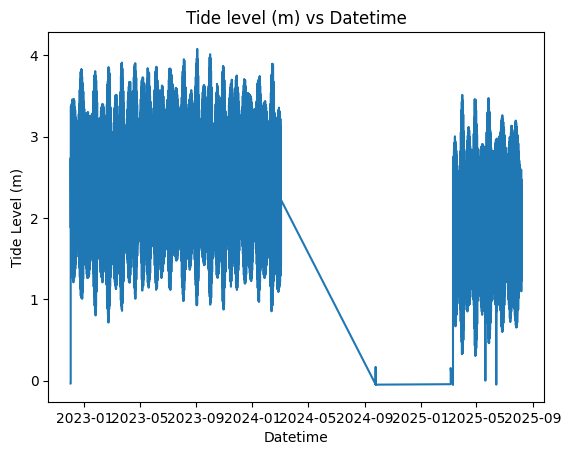

In [14]:
# Gráfica Tide Level (m) vs Datetime:
datetime = df["Datetime"]
tide_level = df["Tide_level"] 
plt.plot(datetime, tide_level)
plt.xlabel("Datetime")
plt.ylabel("Tide Level (m)")
plt.title("Tide level (m) vs Datetime")
plt.show()



In [15]:
# Datos estadísticos Tide Level:
df["Tide_level"].describe()

count    57978.000000
mean         2.288664
std          0.724852
min         -0.052492
25%          1.706000
50%          2.281084
75%          2.892000
max          4.079000
Name: Tide_level, dtype: float64

In [18]:
# Rango de la marea: 
df["Tide_level"].max() - df["Tide_level"].min()

np.float64(4.131492349999999)

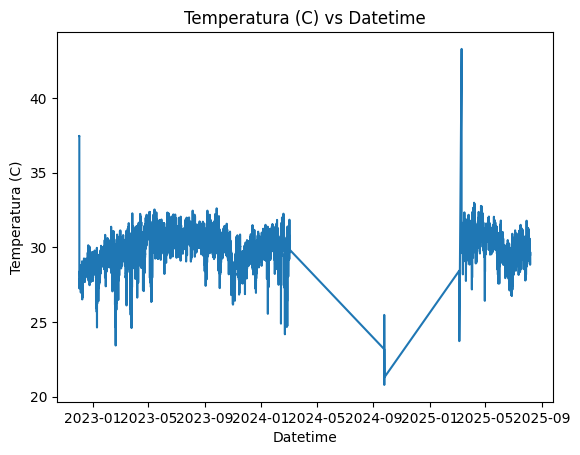

In [20]:
# Gráfica Temperatura (C) vs Datetime:
temperatura = df["Temperatura"] 
plt.plot(datetime, temperatura)
plt.xlabel("Datetime")
plt.ylabel("Temperatura (C)")
plt.title("Temperatura (C) vs Datetime")
plt.show()

In [26]:
# Datos estadísticos de la temperatura:
df["Temperatura"].describe()

count    57978.000000
mean        29.896980
std          0.983658
min         20.781890
25%         29.345700
50%         30.001120
75%         30.554000
max         43.290680
Name: Temperatura, dtype: float64

In [22]:
# Rango de la temperatura:
df["Temperatura"].max() - df["Temperatura"].min()

np.float64(22.50879)

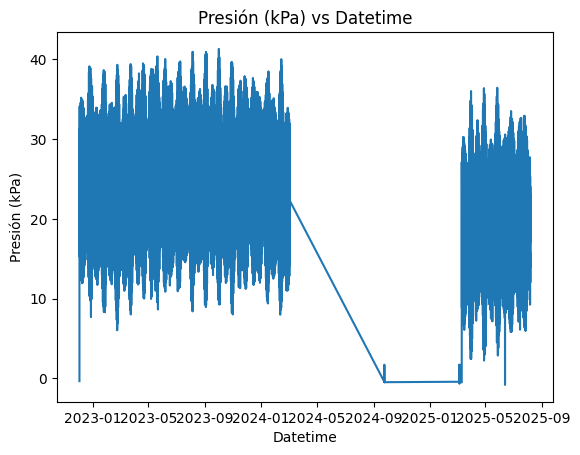

In [24]:
# Gráfica Presión (C) vs Datetime:
pressure = df["Pressure_kPa"] 
plt.plot(datetime, pressure)
plt.xlabel("Datetime")
plt.ylabel("Presión (kPa)")
plt.title("Presión (kPa) vs Datetime")
plt.show()

In [27]:
# Datos estadísticos de la presión:
df["Pressure_kPa"].describe()

count    57978.000000
mean        22.944094
std          7.283476
min         -0.835387
25%         17.098000
50%         22.862145
75%         28.994000
max         41.311000
Name: Pressure_kPa, dtype: float64

In [28]:
# Rango de la temperatura:
df["Pressure_kPa"].max() - df["Pressure_kPa"].min()

np.float64(42.1463868)